## <center> Assignment 3 </center>

#### Name: Tamal Chakroborty
#### Student ID: 245830440


## Question 1

Given the following directed graph with 6 nodes:

- Node 0 → Node 1
- Node 0 → Node 2
- Node 1 → Node 3
- Node 2 → Node 3
- Node 3 → Node 4
- Node 4 → Node 5
- Node 5 → Node 0

Suppose nodes `{0, 1, 2, 3}` are associated with **topic A**, and nodes `{4, 5}` are associated with **topic B**. Implement the topic-sensitive PageRank algorithm (targeting **topic B**) and output the importance scores for nodes `{0, 1, 2, 3, 4, 5}`.

Set the parameter $\alpha = 0.8$. The convergence criterion is that the Manhattan Distance of the output scores is less than $1.0 \times 10^{-3}$.


In [235]:
import numpy as np

def create_transition_matrix(graph, n):
    """
    Creates the transition matrix from the adjacency matrix (graph)
    """
    transition_matrix = np.zeros((n, n))
    
    for i in range(n):
        outgoing = np.sum(graph[i])
        if outgoing > 0:
            transition_matrix[:, i] = graph[i] / outgoing
        else:
            transition_matrix[:, i] = 1 / n 
    
    return transition_matrix
    

def create_teleportation_vector(n, topic_nodes):
    """
    Creates a teleportation vector that is biased toward the nodes associated with a given topic.
    """
    teleportation_vector = np.zeros(n)
    for node in topic_nodes:
        teleportation_vector[node] = 1
    teleportation_vector /= teleportation_vector.sum() 
    
    return teleportation_vector
    

def update_rank(transition_matrix, rank, teleportation_vector, alpha):
    """
    Updates the rank vector using the PageRank equation.
    """
    return alpha * transition_matrix @ rank + (1 - alpha) * teleportation_vector
    

def compute_topic_sensitive_pagerank(graph, topic_nodes, alpha, cov_tol):
    """
    Computes the Topic-Sensitive PageRank (TSPR) scores for the graph, biased toward the given topic nodes.
    """
    n = len(graph)
    
    # Create the transition matrix
    transition_matrix = create_transition_matrix(graph, n)
    
    # Create the teleportation vector or normalized vector
    teleportation_vector = create_teleportation_vector(n, topic_nodes)
    
    # Initialize rank vector (uniform distribution)
    rank = np.ones(n) / n
    
    # Update the rank vector until convergence
    while True:
        new_rank = update_rank(transition_matrix, rank, teleportation_vector, alpha)
        if np.sum(np.abs(new_rank - rank)) < cov_tol:
            break
        rank = new_rank
    
    return rank



ADJACENCY_MATRIX = np.array([
    [0, 1, 1, 0, 0, 0],  # Node 0 -> 1 & 0 -> 2
    [0, 0, 0, 1, 0, 0],  # Node 1 -> 3 
    [0, 0, 0, 1, 0, 0],  # Node 2 -> 3
    [0, 0, 0, 0, 1, 0],  # Node 3 -> 4
    [0, 0, 0, 0, 0, 1],  # Node 4 -> 5
    [1, 0, 0, 0, 0, 0],  # Node 5 -> 0
], dtype=float)


# For simplicy, we are focusing on Topic B for teleportation vector topic,  
# with no teleportation probability for Topic A nodes, except for the influence they get through the graph structure itself.
# Thus, we are considering only the following topic node
topic_nodes = [4, 5]

ALPHA = 0.8
CONVERGENCE_THRESHOLD = 1e-3

scores = compute_topic_sensitive_pagerank(ADJACENCY_MATRIX, topic_nodes, ALPHA, CONVERGENCE_THRESHOLD)

print("Importance scores per node:")
for i, score in enumerate(scores):
    print(f"Node {i}: {score}")


Importance scores per node:
Node 0: 0.21424095565041618
Node 1: 0.0856319062164537
Node 2: 0.0856319062164537
Node 3: 0.13688209785890035
Node 4: 0.20957015433083304
Node 5: 0.26804297972694313


## Question 2

After implementing the topic-sensitive PageRank algorithm in Question 1, your task now is to visualize the graph and its PageRank scores.

### Objectives:
- Visualize the directed graph created in Question 1. You may use the NetworkX package for visualization.
- Normalize the PageRank scores to the range [0, 1] using min-max normalization.
- Map the normalized PageRank scores to a sequential color scale for node visualization. Nodes with higher importance (higher scores) should be filled with darker colors.


#### Visualize the directed graph created in Question 1. You may use the NetworkX package for visualization.

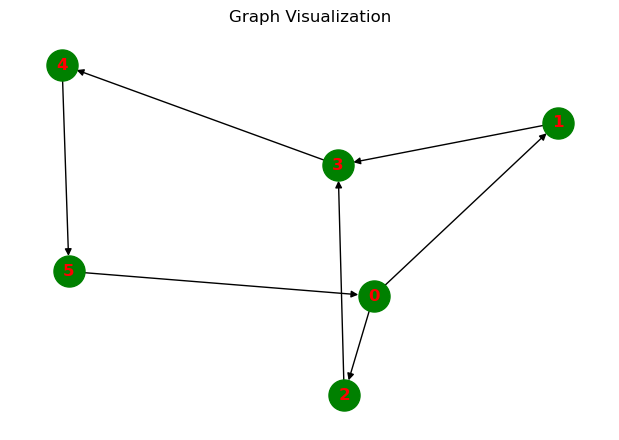

In [237]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()


# Add the edges the from the matrix
n = len(ADJACENCY_MATRIX)
for i in range(n):
    for j in range(n):
        if ADJACENCY_MATRIX[i, j] != 0:  
            G.add_edge(i, j)

position = nx.spring_layout(G)

plt.figure(figsize=(6, 4))
nx.draw(G, position, with_labels=True, node_size=500, node_color="green", font_color="red", font_size=12, font_weight="bold", arrowsize=10)

# Show the plot
plt.title("Graph Visualization")
plt.show()


#### Normalize the PageRank scores to the range [0, 1] using min-max normalization.

In [227]:
pageRankScore = scores
print("Previous Topic Specific Page Rank Scores" , pageRankScore)

min_score = np.min(pageRankScore)
max_score = np.max(pageRankScore)
normalized_scores = (pageRankScore - min_score) / (max_score - min_score)
print("MIN-MAX Normalized Previous Topic Specific Page Rank Scores",  normalized_scores)


Previous Topic Specific Page Rank Scores [0.21424096 0.08563191 0.08563191 0.1368821  0.20957015 0.26804298]
MIN-MAX Normalized Previous Topic Specific Page Rank Scores [0.70505067 0.         0.         0.28095987 0.67944476 1.        ]


#### Map the normalized PageRank scores to a sequential color scale for node visualization. Nodes with higher importance (higher scores) should be filled with darker colors.

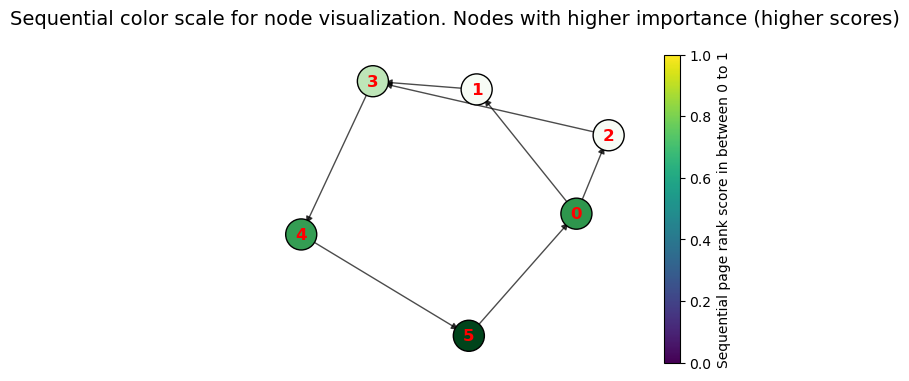

In [229]:
color_map = plt.cm.Greens 
node_colors = color_map(normalized_scores)
pos = nx.spring_layout(G, seed=84)

plt.figure(figsize=(6, 4))
nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.7, arrows=True)

nodes = nx.draw_networkx_nodes(
    G, pos, node_color=node_colors, cmap=color_map, node_size=500, edgecolors="black"
)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="red")

plt.colorbar(nodes, ax=plt.gca(), orientation="vertical", label="Sequential page rank score in between 0 to 1")

plt.title("Sequential color scale for node visualization. Nodes with higher importance (higher scores)\n", fontsize=14)
plt.axis("off")
plt.show()